In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [2]:
data = pd.read_csv('dataset.csv')

C:\Users\Vergil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
data

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,IXOB,Index,Q,Quarterly,2015-Q1,Q1-2015,IDX,Index,0,Units,2015_100,2015=100,99.166660,NaN,NaN
1,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,IXOB,Index,Q,Quarterly,2015-Q2,Q2-2015,IDX,Index,0,Units,2015_100,2015=100,100.133300,NaN,NaN
2,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,IXOB,Index,Q,Quarterly,2015-Q3,Q3-2015,IDX,Index,0,Units,2015_100,2015=100,100.866700,NaN,NaN
3,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,IXOB,Index,Q,Quarterly,2015-Q4,Q4-2015,IDX,Index,0,Units,2015_100,2015=100,99.866670,NaN,NaN
4,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,IXOB,Index,Q,Quarterly,2016-Q1,Q1-2016,IDX,Index,0,Units,2015_100,2015=100,100.933300,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607125,GBR,United Kingdom,CPHPLA01,"HICP: Overall index excluding energy, food, al...",GP,Percentage change from previous period,Q,Quarterly,2020-Q1,Q1-2020,PC,Percentage,0,Units,NaN,NaN,0.000000,NaN,NaN
607126,GBR,United Kingdom,CPHPLA01,"HICP: Overall index excluding energy, food, al...",GP,Percentage change from previous period,Q,Quarterly,2020-Q2,Q2-2020,PC,Percentage,0,Units,NaN,NaN,0.460830,NaN,NaN
607127,GBR,United Kingdom,CPHPLA01,"HICP: Overall index excluding energy, food, al...",GP,Percentage change from previous period,Q,Quarterly,2020-Q3,Q3-2020,PC,Percentage,0,Units,NaN,NaN,0.458716,NaN,NaN
607128,GBR,United Kingdom,CPHPLA01,"HICP: Overall index excluding energy, food, al...",GP,Percentage change from previous period,Q,Quarterly,2020-Q4,Q4-2020,PC,Percentage,0,Units,NaN,NaN,0.456621,NaN,NaN


### Data Pre-Processing

In [8]:
data.isnull().any()

LOCATION                 False
Country                  False
SUBJECT                  False
Subject                  False
MEASURE                  False
Measure                  False
FREQUENCY                False
Frequency                False
TIME                     False
Time                     False
Unit Code                False
Unit                     False
PowerCode Code           False
PowerCode                False
Reference Period Code     True
Reference Period          True
Value                    False
Flag Codes                True
Flags                     True
dtype: bool

In [9]:
null_columns = data.columns[data.isnull().any()]

In [10]:
null_columns

Index(['Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'], dtype='object')

In [11]:
data[data.isnull().any(axis=1)][null_columns]

,Reference Period Code,Reference Period,Flag Codes,Flags
0,2015_100,2015=100,NaN,NaN
1,2015_100,2015=100,NaN,NaN
2,2015_100,2015=100,NaN,NaN
3,2015_100,2015=100,NaN,NaN
4,2015_100,2015=100,NaN,NaN
...,...,...,...,...
607125,NaN,NaN,NaN,NaN
607126,NaN,NaN,NaN,NaN
607127,NaN,NaN,NaN,NaN
607128,NaN,NaN,NaN,NaN


In [15]:
data['Flag Codes'].value_counts()

U    1086
Name: Flag Codes, dtype: int64

In [16]:
data[data['Flag Codes'].notnull()]

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
118515,ITA,Italy,CP030000,CPI: 03 - Clothing and footwear,IXOB,Index,A,Annual,2020,2020,IDX,Index,0,Units,2015_100,2015=100,102.025000,U,Low reliability
119965,ITA,Italy,CP030000,CPI: 03 - Clothing and footwear,IXOB,Index,Q,Quarterly,2020-Q1,Q1-2020,IDX,Index,0,Units,2015_100,2015=100,101.733300,U,Low reliability
119966,ITA,Italy,CP030000,CPI: 03 - Clothing and footwear,IXOB,Index,Q,Quarterly,2020-Q2,Q2-2020,IDX,Index,0,Units,2015_100,2015=100,102.133300,U,Low reliability
121192,FRA,France,CP030000,CPI: 03 - Clothing and footwear,GP,Percentage change from previous period,A,Annual,2020,2020,PC,Percentage,0,Units,NaN,NaN,-0.449270,U,Low reliability
122118,FRA,France,CP030000,CPI: 03 - Clothing and footwear,GY,Percentage change on the same period of the pr...,M,Monthly,2020-04,Apr-2020,PC,Percentage,0,Units,NaN,NaN,-0.869145,U,Low reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604263,EU27_2020,European Union – 27 countries (from 01/02/2020),CPHP0900,HICP: 09 - Recreation and culture,GP,Percentage change from previous period,M,Monthly,2020-04,Apr-2020,PC,Percentage,0,Units,NaN,NaN,1.400000,U,Low reliability
604264,EU27_2020,European Union – 27 countries (from 01/02/2020),CPHP0900,HICP: 09 - Recreation and culture,GP,Percentage change from previous period,M,Monthly,2020-05,May-2020,PC,Percentage,0,Units,NaN,NaN,-0.200000,U,Low reliability
604417,EU27_2020,European Union – 27 countries (from 01/02/2020),CPHP1100,HICP: 11 - Restaurants and hotels,GP,Percentage change from previous period,M,Monthly,2020-04,Apr-2020,PC,Percentage,0,Units,NaN,NaN,1.200000,U,Low reliability
604418,EU27_2020,European Union – 27 countries (from 01/02/2020),CPHP1100,HICP: 11 - Restaurants and hotels,GP,Percentage change from previous period,M,Monthly,2020-05,May-2020,PC,Percentage,0,Units,NaN,NaN,0.400000,U,Low reliability


In [17]:
data[data['Flags'].notnull()]

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
118515,ITA,Italy,CP030000,CPI: 03 - Clothing and footwear,IXOB,Index,A,Annual,2020,2020,IDX,Index,0,Units,2015_100,2015=100,102.025000,U,Low reliability
119965,ITA,Italy,CP030000,CPI: 03 - Clothing and footwear,IXOB,Index,Q,Quarterly,2020-Q1,Q1-2020,IDX,Index,0,Units,2015_100,2015=100,101.733300,U,Low reliability
119966,ITA,Italy,CP030000,CPI: 03 - Clothing and footwear,IXOB,Index,Q,Quarterly,2020-Q2,Q2-2020,IDX,Index,0,Units,2015_100,2015=100,102.133300,U,Low reliability
121192,FRA,France,CP030000,CPI: 03 - Clothing and footwear,GP,Percentage change from previous period,A,Annual,2020,2020,PC,Percentage,0,Units,NaN,NaN,-0.449270,U,Low reliability
122118,FRA,France,CP030000,CPI: 03 - Clothing and footwear,GY,Percentage change on the same period of the pr...,M,Monthly,2020-04,Apr-2020,PC,Percentage,0,Units,NaN,NaN,-0.869145,U,Low reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604263,EU27_2020,European Union – 27 countries (from 01/02/2020),CPHP0900,HICP: 09 - Recreation and culture,GP,Percentage change from previous period,M,Monthly,2020-04,Apr-2020,PC,Percentage,0,Units,NaN,NaN,1.400000,U,Low reliability
604264,EU27_2020,European Union – 27 countries (from 01/02/2020),CPHP0900,HICP: 09 - Recreation and culture,GP,Percentage change from previous period,M,Monthly,2020-05,May-2020,PC,Percentage,0,Units,NaN,NaN,-0.200000,U,Low reliability
604417,EU27_2020,European Union – 27 countries (from 01/02/2020),CPHP1100,HICP: 11 - Restaurants and hotels,GP,Percentage change from previous period,M,Monthly,2020-04,Apr-2020,PC,Percentage,0,Units,NaN,NaN,1.200000,U,Low reliability
604418,EU27_2020,European Union – 27 countries (from 01/02/2020),CPHP1100,HICP: 11 - Restaurants and hotels,GP,Percentage change from previous period,M,Monthly,2020-05,May-2020,PC,Percentage,0,Units,NaN,NaN,0.400000,U,Low reliability


In [22]:
data_percentage = data[data['Measure']!='Index']

In [23]:
data_percentage

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
625,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,GY,Percentage change on the same period of the pr...,Q,Quarterly,2015-Q1,Q1-2015,PC,Percentage,0,Units,NaN,NaN,1.813826,NaN,NaN
626,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,GY,Percentage change on the same period of the pr...,Q,Quarterly,2015-Q2,Q2-2015,PC,Percentage,0,Units,NaN,NaN,2.003396,NaN,NaN
627,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,GY,Percentage change on the same period of the pr...,Q,Quarterly,2015-Q3,Q3-2015,PC,Percentage,0,Units,NaN,NaN,1.954178,NaN,NaN
628,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,GY,Percentage change on the same period of the pr...,Q,Quarterly,2015-Q4,Q4-2015,PC,Percentage,0,Units,NaN,NaN,1.870112,NaN,NaN
629,DNK,Denmark,CP040100,CPI: 04.1 - CPI Actual rentals for housing,GY,Percentage change on the same period of the pr...,Q,Quarterly,2016-Q1,Q1-2016,PC,Percentage,0,Units,NaN,NaN,1.781513,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607125,GBR,United Kingdom,CPHPLA01,"HICP: Overall index excluding energy, food, al...",GP,Percentage change from previous period,Q,Quarterly,2020-Q1,Q1-2020,PC,Percentage,0,Units,NaN,NaN,0.000000,NaN,NaN
607126,GBR,United Kingdom,CPHPLA01,"HICP: Overall index excluding energy, food, al...",GP,Percentage change from previous period,Q,Quarterly,2020-Q2,Q2-2020,PC,Percentage,0,Units,NaN,NaN,0.460830,NaN,NaN
607127,GBR,United Kingdom,CPHPLA01,"HICP: Overall index excluding energy, food, al...",GP,Percentage change from previous period,Q,Quarterly,2020-Q3,Q3-2020,PC,Percentage,0,Units,NaN,NaN,0.458716,NaN,NaN
607128,GBR,United Kingdom,CPHPLA01,"HICP: Overall index excluding energy, food, al...",GP,Percentage change from previous period,Q,Quarterly,2020-Q4,Q4-2020,PC,Percentage,0,Units,NaN,NaN,0.456621,NaN,NaN


In [39]:
years = ['2015','2016','2017','2018','2019','2020']
data_percentage = data_percentage[data_percentage['Unit']!= 'Index']

In [41]:
final_data = data_percentage.loc[data_percentage['Time'].isin(years)]

In [42]:
final_data

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
115625,MEX,Mexico,CP010000,CPI: 01 - Food and non-Alcoholic beverages,GP,Percentage change from previous period,A,Annual,2015,2015,PC,Percentage,0,Units,NaN,NaN,3.989153,NaN,NaN
115626,MEX,Mexico,CP010000,CPI: 01 - Food and non-Alcoholic beverages,GP,Percentage change from previous period,A,Annual,2016,2016,PC,Percentage,0,Units,NaN,NaN,4.469661,NaN,NaN
115627,MEX,Mexico,CP010000,CPI: 01 - Food and non-Alcoholic beverages,GP,Percentage change from previous period,A,Annual,2017,2017,PC,Percentage,0,Units,NaN,NaN,6.966013,NaN,NaN
115628,MEX,Mexico,CP010000,CPI: 01 - Food and non-Alcoholic beverages,GP,Percentage change from previous period,A,Annual,2018,2018,PC,Percentage,0,Units,NaN,NaN,4.795746,NaN,NaN
115629,MEX,Mexico,CP010000,CPI: 01 - Food and non-Alcoholic beverages,GP,Percentage change from previous period,A,Annual,2019,2019,PC,Percentage,0,Units,NaN,NaN,4.388219,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606819,AUT,Austria,CPGRLH02,CPI: Services less housing (Housing excluding ...,GP,Percentage change from previous period,A,Annual,2016,2016,PC,Percentage,0,Units,NaN,NaN,2.273128,NaN,NaN
606820,AUT,Austria,CPGRLH02,CPI: Services less housing (Housing excluding ...,GP,Percentage change from previous period,A,Annual,2017,2017,PC,Percentage,0,Units,NaN,NaN,2.160376,NaN,NaN
606821,AUT,Austria,CPGRLH02,CPI: Services less housing (Housing excluding ...,GP,Percentage change from previous period,A,Annual,2018,2018,PC,Percentage,0,Units,NaN,NaN,1.801482,NaN,NaN
606822,AUT,Austria,CPGRLH02,CPI: Services less housing (Housing excluding ...,GP,Percentage change from previous period,A,Annual,2019,2019,PC,Percentage,0,Units,NaN,NaN,1.751410,NaN,NaN


## Research Questions and Analysis

#### This problem is a regression problem statement.

### What is the trend of inflation throughout the years ?

(50.0, 54.0)

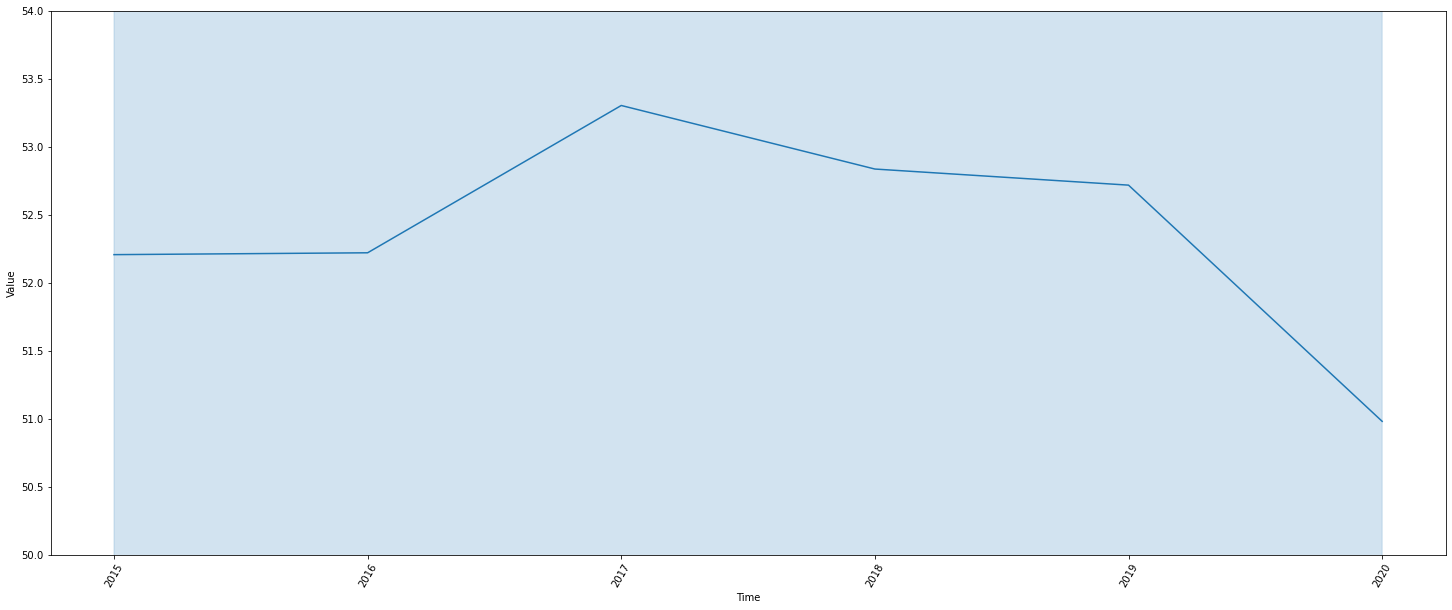

In [47]:
plt.figure(figsize=(25,10))
sns.lineplot(final_data['Time'],final_data['Value'])
plt.xticks(rotation=60)
plt.ylim(50,54)

### Which Country has the highest rate of inflation ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 <a list of 52 Text major ticklabel objects>)

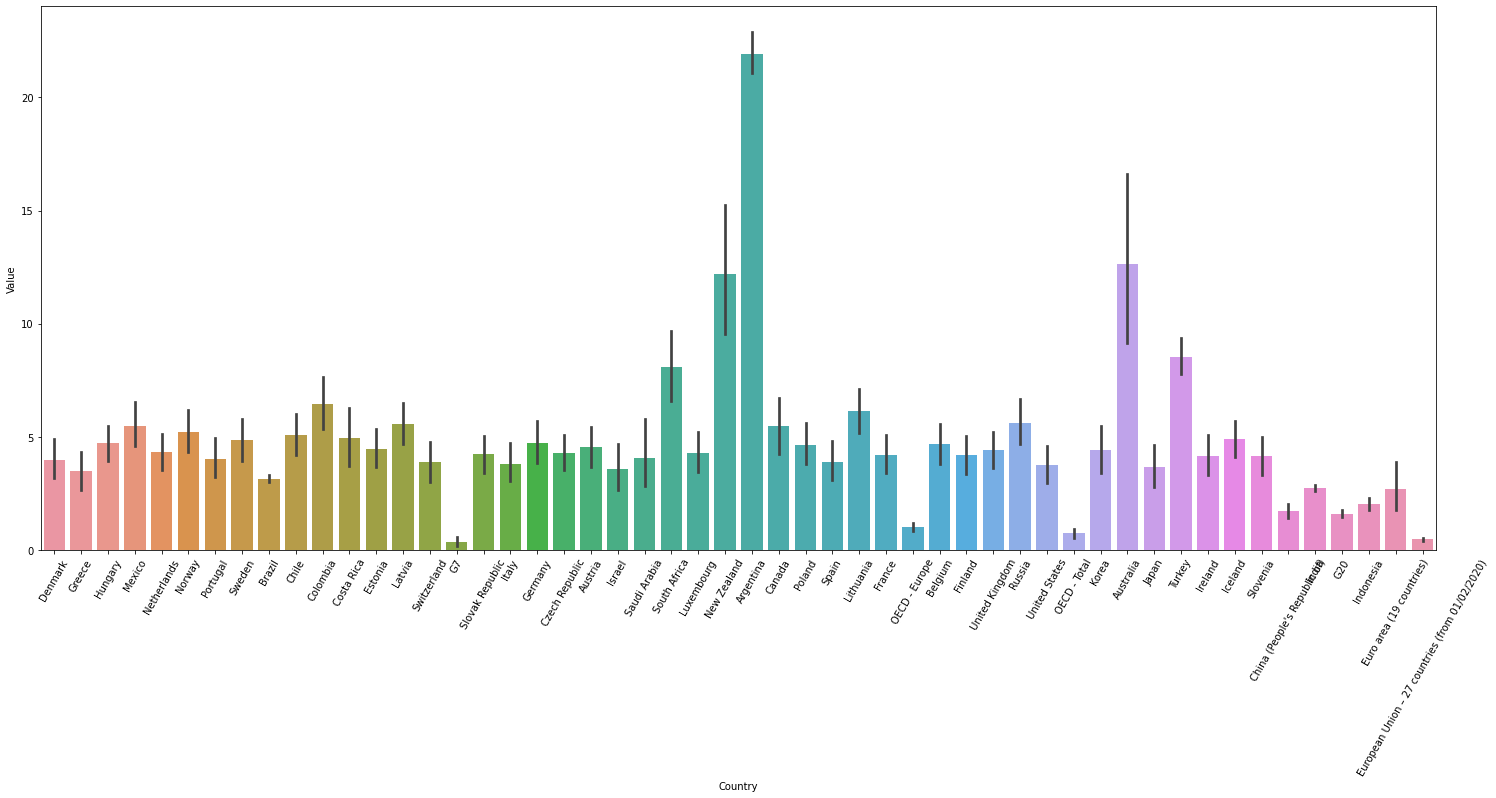

In [56]:
plt.figure(figsize=(25,10))
sns.barplot(data_percentage['Country'],data_percentage['Value'])
plt.xticks(rotation=60)

## Conclusion

- Argentina has the highest inflation rate as compared to other countries.
- The Inflation rate throughout the years tends to decrease from 53 to 50.2.